# Corso di Quantum Computing - Giorno 1: Introduzione a Qiskit

Questo notebook Jupyter serve per introdurre Qiskit e farvi sperimentare con i primi concetti visti.

Corso per Epigenesys s.r.l. <br>
Docenti: Sara Galatro e Lorenzo Gasparini <br>
Supervisore: Prof. Marco Pedicini

In [1]:
# required imports:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import HGate, CXGate
import numpy as np

## Vettori e notazione di Dirac

A lezione, abbiamo visto che gli stati quantistici possono essere rappresentati usando la *notazione di Dirac*, ossia usando i $bra$ e i $ket$. In python, gli stati saranno rappresentati come dei vettori riga o colonna.

Ad esempio, possiamo rappresentare $|0\rangle$ usando una lista di liste e visualizzarlo tramite il pacchetto Qiskit dedicato:

In [2]:
ket0 = [[1],[0]]

# visualization
array_to_latex(ket0)

<IPython.core.display.Latex object>

Analogamente, per $\langle 0|$:

In [3]:
bra0 = [1,0]
array_to_latex(bra0)

<IPython.core.display.Latex object>

**Ex 1 - Create $|1\rangle$ e $\langle 1|$ usando le liste**

In [4]:
# add your code
ket1 = [[0],[1]]
bra1 = [0,1]

In [5]:
array_to_latex(bra1)

<IPython.core.display.Latex object>

In [6]:
array_to_latex(ket1)

<IPython.core.display.Latex object>

## Qiskit `Operator` Class

La classe `Operator` è usata per rappresentare gli operatori matriciali che agiscono su un sistema quantistico. Questa classe ha numerose funzioni già definite che permettono di costruire comodamente operatori compositi, sia tramite prodotto tensoriale sia tramite composizione.

Possiamo inizializzare un `Operator` Qiskit usando una lista python, come quelle che abbiamo creato prima.

Link di riferimento: https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#qiskit.quantum_info.Operator

In [7]:
op_bra0 = Operator(bra0)
op_bra0

Operator([1.+0.j, 0.+0.j],
         input_dims=(), output_dims=(2,))

La classe `Operator` è utile per calcolare, ad esempio, il prodotto tensoriale di due operatori, grazie al metodo `tensor()`.

In [8]:
op_ket0 = Operator(ket0)
op_bra0.tensor(op_ket0)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(), output_dims=(2, 2))

## Prodotto interno ed esterno

A lezione abbiamo visto i prodotti interno ed esterno: esploriamo dunque questi concetti usando, rispettivamente, le funzioni numpy `.dot()` e `.outer()`.

Ad esempio, possiamo trovare il prodotto interno $\langle0|0\rangle$ come segue:

In [9]:
braket = np.dot(op_bra0,op_ket0)
array_to_latex(braket)

<IPython.core.display.Latex object>

e il prodotto esterno $|0\rangle\langle0|$ come:

In [10]:
ketbra = np.outer(ket0,bra0)
array_to_latex(ketbra)

<IPython.core.display.Latex object>

*Nota*: le funzioni numpy appena usate sono compatibili anche con la classe Qiksit `Operator`, oltre che con delle regolari liste python.

**Ex 2 - Usate numpy per trovare il risultato dei seguenti prodotti: $\langle 1|0 \rangle, \langle 0|1\rangle,\langle 1|1\rangle, |1\rangle \langle 0|, |0\rangle \langle 1|, |1\rangle \langle1|$**

In [11]:
# add your code
bra1ket0 = np.dot(bra1,ket0)
bra0ket1 = np.dot(bra0,ket1)
bra1ket1 = np.dot(bra1,ket1)

ket1bra0 = np.outer(ket1,bra0)
ket0bra1 = np.outer(ket0,bra1)
ket1bra1 = np.outer(ket1,bra1)

In [12]:
print(bra1ket0, bra0ket1, bra1ket1)
print()
print(ket1bra0, "\n\n", ket0bra1, "\n\n", ket1bra1)

[0] [0] [1]

[[0 0]
 [1 0]] 

 [[0 1]
 [0 0]] 

 [[0 0]
 [0 1]]


**Ex 3 - Quali dei seguenti stati sono tra loro ortogonali?** </p>
    <p>a) $\vert 0\rangle$ e $\vert 1\rangle$ </p>
    <p>b) $\vert 0\rangle$ e $\vert 0\rangle$ </p>
    <p>c) $\vert 1\rangle$ e $\vert 1\rangle$ </p>


In [13]:
# lasciare nella lista solo gli stati ortogonali
answer = ['a'] 

## Operazioni deterministiche

Come abbiamo visto durante la parte teorica, ci sono $4$ operazioni deterministiche che possono agire su un singolo bit:<br>
$f_0$ = costante-$0$<br>
$id$ = identità <br>
$\mathbf{NOT}$ = bit flip  <br>
$f_1 =$ costante-$1$  <br>

$$
\begin{array}{c|c}
  a & f_0(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & id(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & \mathbf{NOT}(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

Possiamo creare degli Operatori Qiskit di queste operazioni passando le relative rappresentazioni matriciali come argomenti alla classe `Operator`. 

Ad esempio, per la funzione costante a $0$, l'operatore associato è il seguente:

In [14]:
M_0 = Operator([[1,1],[0,0]])
array_to_latex(M_0)

<IPython.core.display.Latex object>

e analogamente per l'identità:

In [15]:
M_id = Operator([[1,0],[0,1]])
array_to_latex(M_id)

<IPython.core.display.Latex object>

Possiamo anche usare le funzioni presenti in python per la moltiplicazione tra matrici e/o vettori (e.g. `@`, `.dot`, or `.matmul`) per applicare le operazioni agli stati o concatenare più operazioni.

Verfichiamo, ad esempio, che
$$
 \mathbf{M_{0}} |1\rangle = |0\rangle
$$

In [16]:
array_to_latex(M_0@ket1)

<IPython.core.display.Latex object>

**Ex 4 - create gli operatori Qiskit per $\mathbf{NOT}$ e $f_1$**

In [17]:
# add your code
M_NOT = Operator([[0,1],[1,0]])

M_1 = Operator([[0,0],[1,1]])

In [18]:
array_to_latex(M_NOT)

<IPython.core.display.Latex object>

In [19]:
array_to_latex(M_1)

<IPython.core.display.Latex object>

## Operazioni Probabilistiche

Un *Controlled-NOT* (o $\mathbf{CNOT}$) è un'operazione probabilistica che è possibile applicare su $2$ bit.

Applicare un $\mathbf{CNOT}$ su uno stato $(X,Y)$ significa applicare un $\mathbf{NOT}$ su $Y$ quando $X=1$ e non fare nulla quando $X=0$. Per questo motivo, $X$ è detto *bit di controllo* e $Y$ è detto *bit target*.

Possiamo implementare un $\mathbf{CNOT}$ gate usando l'omonima classe dalla libreria dei circuiti di Qiskit (e analogamente per molti altri gate).

Link di riferimento: https://qiskit.org/documentation/apidoc/circuit_library.html

In [20]:
cnot = CXGate()
array_to_latex(cnot)

<IPython.core.display.Latex object>

Nota: questa matrice è diversa da quella vista durante la parte teorica perché `CXGate()` prende come controllo il bit di destra, invece che quello di sinistra.

## Qiskit `Statevector` Class

Oltre alle semplici liste, esiste un altro modo di rappresentare gli stati quantistici è tramite la classe Qiskit `Statevector`. Questa classe può prendere vari formati in input (e.g. lista, array numpy, un altro state vector) per costruire un nuovo state vector.

Prendiamo dunque l'oggetto `bra0` creato a inizio del notebook e convertiamolo in uno `Statevector`.

Link di riferimento: https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html

In [21]:
sv_bra0 = Statevector(bra0)
sv_bra0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


La classe `Statevector` ha una propria funzione `draw()`:

In [22]:
sv_bra0.draw('latex')

<IPython.core.display.Latex object>

Possiamo anche definire uno `Statevector` passandogli in input una lista con le ampiezze:

In [23]:
sv_eq = Statevector([1/2, 3/4, 4/5, 6/8])
sv_eq.draw('latex')

<IPython.core.display.Latex object>

Osserviamo però che il vettore appena definito non è uno stato quantistico valido, dato che non è normalizzato. Possiamo verificare la validità del nostro stato con la funzione `is_valid()`:

In [24]:
sv_eq.is_valid()

False

**Ex 5 - Create uno statevector valido usando la classe omonima**

In [25]:
# add your code
sv_valid = Statevector([0, 0, np.sqrt(2/3), np.sqrt(1/3)])
sv_valid.is_valid()

True

## Operazioni unitarie

Un operatore è unitario se $ UU^{\dagger} = \mathbb{I} = U^{\dagger} U$. 

Possiamo verificare se un operatore è unitario usando la funzione Qiskit `is_unitary()`:

In [26]:
M_NOT.is_unitary()

True

Con operatori di dimensioni contenute e con entrate semplici, come $\mathbf{M_{NOT}}$, è facile verificare che siano unitari anche a mano, ma con operatori più complessi questa funzione risulta molto utile:

In [27]:
random = Operator(np.array([[ 0.50778085-0.44607116j, -0.1523741 +0.14128434j,  0.44607116+0.50778085j,
  -0.14128434-0.1523741j ],
 [ 0.16855994+0.12151822j,  0.55868196+0.38038841j, -0.12151822+0.16855994j,
  -0.38038841+0.55868196j],
 [ 0.50778085-0.44607116j, -0.1523741 +0.14128434j, -0.44607116-0.50778085j,
   0.14128434+0.1523741j ],
 [ 0.16855994+0.12151822j,  0.55868196+0.38038841j,  0.12151822-0.16855994j,
   0.38038841-0.55868196j]]))

random.is_unitary()

True

**Ex 6 - create un operatore, usando la classe `Operator`, che non sia unitario.**

In [28]:
# add your code
non_unitary_op = Operator(np.array( [[0, 1],[1,1]] ))
non_unitary_op.is_unitary()

False

### Operazioni unitarie sui qubit - operatori di Pauli

Alcuni degli operatori più utilizzati nel quantum computing sono i cosiddetti operatori di Pauli. La classe Qiskit `Pauli` rende facile interagire con tali operatori:

Ad esempio, Pauli X ($\sigma_x$), che corrisponde al bit flip:

In [29]:
pauli_x = Pauli('X')
array_to_latex(pauli_x)

<IPython.core.display.Latex object>

Pauli Y ($\sigma_y$):

In [30]:
pauli_y = Pauli('Y')
array_to_latex(pauli_y)

<IPython.core.display.Latex object>

Pauli Z ($\sigma_z$), il ribaltamento di fase:

In [31]:
pauli_z = Pauli('Z')
array_to_latex(pauli_z)

<IPython.core.display.Latex object>

In [32]:
pauli_x

Pauli('X')

Possiamo usare la classe `Operator` con la classe `Pauli`:

In [33]:
op_x = Operator(pauli_x)
array_to_latex(op_x)

<IPython.core.display.Latex object>

In [34]:
op_x

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Usiamo ora la classe `Operator` e numpy per trovare il risultato di $\sigma_x |0\rangle$:

In [35]:
op_new = np.dot(op_x,ket0)
array_to_latex(op_new)

<IPython.core.display.Latex object>

**Ex 7 - Applicate l'operatore Pauli-Z a $|1\rangle$**

In [36]:
# add your code
op_z = Operator(pauli_z)
result = np.dot(op_z, ket1)

In [37]:
array_to_latex(result)

<IPython.core.display.Latex object>

### Operazioni unitarie sui qubit - Hadamard

L'Hadamard gate è una delle più importanti operazioni unitarie nel quantum computing. 
Possiamo implementare un gate Hadamard usando una classe dalla libreria dei circuiti Qiskit.

Link di riferimento: https://qiskit.org/documentation/apidoc/circuit_library.html

In [38]:
hadamard = HGate()
array_to_latex(hadamard)

<IPython.core.display.Latex object>

Come abbiamo accennato prima, molte classi Qiskit possono essere convertite in operatori, così da far uso di funzioni specifiche, come ad esempio `is_unitary`:

In [39]:
hop = Operator(hadamard)
hop.is_unitary()

True

## Verso i Quantum Circuits

Prima di introdurre alcuni primi esempi di circuiti quantistici, vediamo com'è possibile far evolvere uno stato tramite operatori unitari.

In [40]:
# definizione stato iniziale
v = Statevector([1, 0])

# operatore T
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

# evoluzione
v = v.evolve(hadamard)
v = v.evolve(T)
v = v.evolve(hadamard)
v = v.evolve(T)
v = v.evolve(op_z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

**Ex.8 Sfruttare il [Quantum Composer](https://quantum-computing.ibm.com/composer) per ottenere una formulazione tramite circuito.**

In [41]:
# add your code here
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')

circuit = QuantumCircuit(qreg_q)

circuit.h(qreg_q[0])
circuit.t(qreg_q[0])
circuit.h(qreg_q[0])
circuit.t(qreg_q[0])
circuit.z(qreg_q[0])

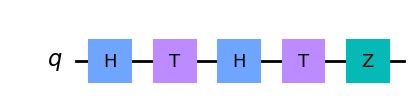

In [42]:
circuit.draw("mpl")
# se non vi funziona il draw
# levate "mpl" ed eseguite il comando senza specifiche

## Misurare Stati Quantistici

Come abbiamo visto a lezione, possiamo ricavare la probabilità di un risultato della misurazione di uno stato prendendo il quadrato dei valori assoluti delle entrate del vettore associato a tale stato.

Ad esempio, se misuriamo lo stato $|+\rangle$:
$$
    |+\rangle = \frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle
$$
le probabilità di ottenere $0$ o $1$ sono le seguenti:
$$ \mathbb{P}(0) = \left\vert\frac{1}{\sqrt2}\right\vert^2 = \frac{1}{2} \qquad \mathbb{P}(1) =  \left\vert\frac{1}{\sqrt2}\right\vert^2 = \frac{1}{2}$$

Creiamo lo stato $|+\rangle$ usando la classe `Statevector`:

In [43]:
plus_state = Statevector.from_label("+")
plus_state.draw('latex')

<IPython.core.display.Latex object>

Ora ricaviamo le probabilità della misurazione tramite la funzione dedicata:

In [44]:
plus_state.probabilities_dict()

{'0': 0.4999999999999999, '1': 0.4999999999999999}

Il dizionario così ottenuto mostrerà tutti i possibili esiti della misurazione e le relative probabilità. L'effettiva misurazione dello stato porta al suo collasso nel valore (in bit classico) misurato:

In [45]:
# eseguite questa cella diverse volte 
# per vedere il collasso in un valore o nell'altro
res = plus_state.measure()
res

('1',
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

Nel prossimo esempio, useremo la classe `Statevector` per trovare il risultato della misurazione dello stato di Bell $|\Phi^+\rangle$:

In [46]:
sv_bell = Statevector([np.sqrt(1/2), 0, 0, np.sqrt(1/2)])
sv_bell.draw('latex')

<IPython.core.display.Latex object>

In [47]:
sv_bell.probabilities_dict()

{'00': 0.5000000000000001, '11': 0.5000000000000001}

**Ex 9 - Usando la classe `Statevector`, trovare le probabilità di misurazione per gli altri tre stati della base di Bell:**
$$
    |\Psi^+\rangle \qquad |\Psi^-\rangle \qquad |\Phi^-\rangle
$$

In [48]:
# add your code
sv_psi_plus = Statevector([0, np.sqrt(1/2), np.sqrt(1/2), 0])
prob_psi_plus = sv_psi_plus.probabilities_dict()

sv_psi_minus = Statevector([0, np.sqrt(1/2), -np.sqrt(1/2), 0])
prob_psi_minus = sv_psi_minus.probabilities_dict()

sv_phi_minus = Statevector([np.sqrt(1/2), 0, 0, -np.sqrt(1/2)])
prob_phi_minus = sv_phi_minus.probabilities_dict()


In [49]:
sv_psi_minus.probabilities_dict()

{'01': 0.5000000000000001, '10': 0.5000000000000001}

In [50]:
sv_phi_minus.probabilities_dict()

{'00': 0.5000000000000001, '11': 0.5000000000000001}

# Game: Quantum coin

Supponiamo di voler sfidare un quantum computer ad un gioco di sorte.

Abbiamo a disposizione una **moneta quantistica**, su cui possiamo interagire sia noi che il computer, e definiamo le seguenti regole: si giocheranno tre turni, nell'ordine computer $\rightarrow$ noi $\rightarrow$ computer, e se alla fine la moneta è nello stato "testa" allora vince il computer, se è nello stato "croce" vinciamo noi.

Identificheremo, matematicamente, con $|0\rangle$ lo stato "testa" e con $|1\rangle$ lo stato "croce".

Il gioco si sviluppa così:
1. La moneta è inizializzata a $|0\rangle$, ossia in "testa";
2. Il computer applica un gate Hadamard alla moneta;
3. Noi possiamo decidere se ribaltare la moneta (ossia di applicare un bit-flip o gate X), o non fare nulla (applicando il gate identità);
4. Il computer applica nuovamente un gate Hadamard alla moneta.

Ora dunque ci chiediamo, quale strategia possiamo attuare affinché la nostra vittoria sia garantita?

Costruiamo il circuito relativo:

In [51]:
# Importing all the necessary library
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [52]:
# Building the initial circuit
def initial_circuit():

    circuit = QuantumRegister(1, 'circuit')
    measure = ClassicalRegister(1, 'result')

    qc = QuantumCircuit(circuit, measure)
    qc.draw('mpl')

    return qc, circuit, measure

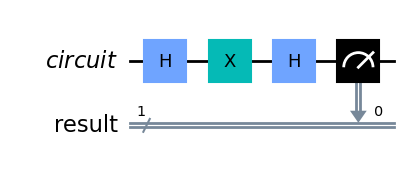

In [53]:
qc, circuit, measure = initial_circuit()

# computer
qc.h(circuit[0])

# human
# provate ad alternare I e X
qc.x(circuit[0])
#qc.id(circuit[0])

# computer
qc.h(circuit[0])

qc.measure(circuit, measure)
qc.draw('mpl')


Tramite simulatore, proviamo a vedere cosa succede su $1024$ tentativi:

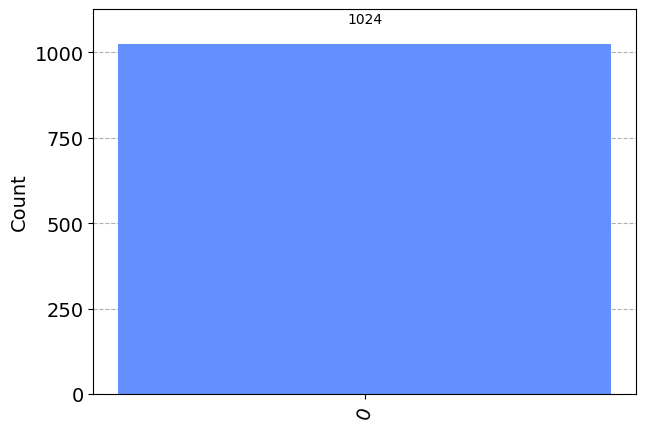

In [54]:
backend = Aer.get_backend('aer_simulator') # invochiamo il simulatore

res = backend.run(qc).result() # risultati della simulazione
answer = res.get_counts() # trasformiamo i risultati in un dizionario

plot_histogram(answer)

In [55]:
if len(answer) == 1 and list(answer.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(answer) == 1 and list(answer.keys())[0] == '1':
    print("Classical Human Wins")
if len(answer) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Quantum Computer Wins


Nonostante la nostra scelta di gate, il computer vince sempre!

Ciò è dovuto al fatto che la prima mossa del computer è creare una sovrapposizione equiprobabile degli stati, rendendo vani gli effetti del bit-flip nel caso in cui decidiamo di applicarlo.

L'unica strategia possibile per vincere è dunque quella di definire un gioco diverso allora!

# Costruire un circuito: i primi passi

Iniziamo questo secondo laboratorio introducendo i principali comandi per la costruzione di circuiti tramite Qiskit, così da poterci poi dedicare al loro utilizzo.

Per definire un circuito, ci serve innanzitutto definire un oggetto `QuantumCircuit` a cui poi andremo ad aggiungere tutte le operazioni che vogliamo. Analizzando la [documentazione relativa](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html), leggiamo

<center>

```
class qiskit.circuit.QuantumCircuit(*regs, name=None, global_phase=0, metadata=None)
```

</center>

dove
* `*regs` sono i registri che useremo e possono essere definiti come lista di Register o lista di interi;
* `name` è il nome del circuito che, se non specificato altrimenti, sarà definito come una stringa generata automaticamente dal sistema;
* `global_phase` è la fase globale, che sappiamo di poter ignorare;
* `metadata` sono dei dati aggiuntivi che però non vengono utilizzati nella computazione del circuito.

Come potete vedere, l'input di maggiore importanza è quello che riguarda i registri, dato che andrà a definire il numero di qubit, di qubit ancilla e di bit classici di cui avremo bisogno.

Costruiamo ora un circuito di esempio con $4$ qubit e $3$ bit classici:

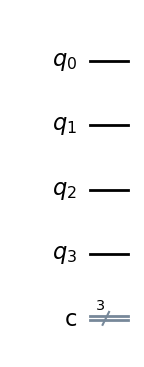

In [56]:
# circuit with Register as input
qc_reg = QuantumCircuit(QuantumRegister(4,"q"), ClassicalRegister(3,"c"))

# draw the circuit
qc_reg.draw('mpl')

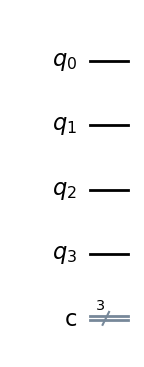

In [57]:
# circuit with Register as input
qc_int = QuantumCircuit(4,3)

# draw the circuit
qc_int.draw('mpl')

Come potete vedere le due definizioni sono completamente analoghe.

Per parlare ora di come aggiungere le operazioni a cui vogliamo sottoporre i nostri qubit, riprendiamo lo stato di Bell $|\Phi^+\rangle$:
$$\frac{\sqrt{2}}{2} |00\rangle+\frac{\sqrt{2}}{2} |11\rangle$$
Nello scorso laboratorio avevamo ottenuto questo stato usando la classe `Statevector` e passandogli una lista di ampiezze, ma possiamo anche costruirlo tramite circuito:

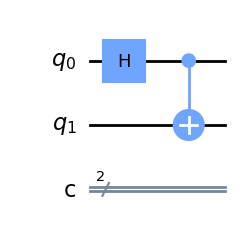

In [58]:
qc_bell = QuantumCircuit(2,2) # quantum circuit with 2 qubits and 2 classical bits

qc_bell.h(0) # apply Hadamard on qubit q0
qc_bell.cx(0, 1) # apply CNOT with control on q0 and target q1

# draw
qc_bell.draw('mpl')

Possiamo ottenere la rappresentazione matriciale di questo circuito convertendolo in operatore:

In [59]:
bell_op = Operator(qc_bell)
array_to_latex(bell_op)

<IPython.core.display.Latex object>

Per misurare i nostri qubit ci basta aggiungere l'operazione di misurazione al circuito, che porterà i qubit a collassare sui bit classici (ecco perché abbiamo definito il circuito con due registri classici).

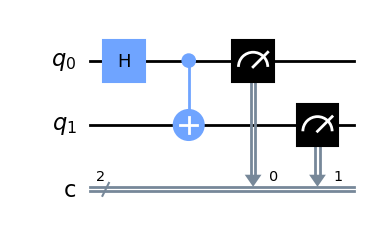

In [60]:
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw('mpl')

Dato che volevamo misurare tutti i nostri qubit, potevamo anche utilizzare la funzione `measure_all`: di default, tale funzione aggiunge dei registri classici sui salvare i risultati delle misurazioni, ma dato che noi abbiamo un circuito già dotato di registri classici appositi, possiamo porre `False` nell'input associato.

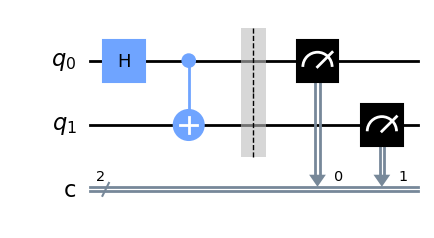

In [61]:
qc_bell = QuantumCircuit(2,2) 

qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.measure_all(add_bits = False)

# draw
qc_bell.draw('mpl')

*Nota:* dato che stiamo aggiungendo pezzi al nostro circuito mano a mano, dobbiamo reinizializzarlo ogni volta, altrimenti avremmo doppie operazioni!

Vedremo nel corso di questo lab che è possibile rimuovere alcune parti di circuito, e nello specifico le misurazioni finali, senza dover reinizializzare il circuito ogni volta.

**Ex 10 - lo stato GHZ è simile a uno stato di Bell, solo che coinvolge 3 qubit. Create un circuito che dia in output lo stato GHZ**

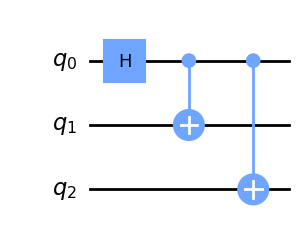

In [62]:
# add your code
ghz = QuantumCircuit(3)

ghz.h(0) # Hadamard
ghz.cx(0,1) # CNOT con controllo in q0 e target q1
ghz.cx(0,2) # CNOT con controllo in q0 e target q2

ghz.draw(output='mpl')

Per una lista completa della sintassi dei gate nei circuiti vi rimandiamo alla [documentazione di Qiskit](https://qiskit.org/documentation/apidoc/circuit_library.html).